In [1]:
import torch 
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
# We first study the FFT in 1D case. 

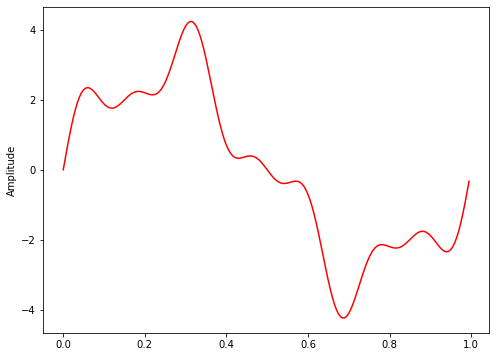

In [78]:
# Let's create a signal with f = 1, 4 and 7. 

sr = 200 # sampling rate
t = np.arange(0, 1, 1.0/sr)

freq = 1
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

In [22]:
# Instead of using fft package, we first manually define a DFT function
def DFT(x):
    """
    Function to calculate the discrete Fourier Transform of a 1D real-valued signal x
    """

    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, x)
    
    return X

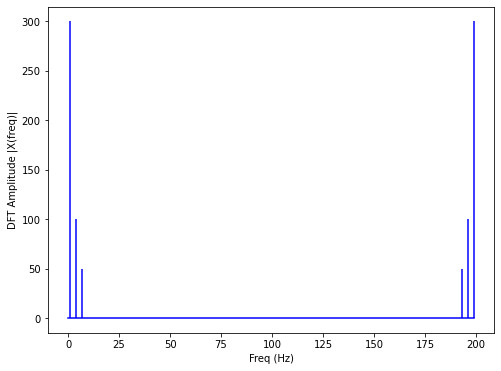

In [26]:
# We use the above DFT function to analysize the singal x


freq = np.arange( len(x) )
plt.figure(figsize = (8, 6))
plt.stem(freq, abs( DFT(x) ), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

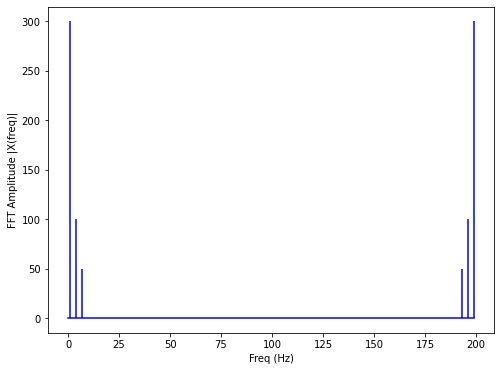

In [28]:
# Now let's use fft in pytorch to calcualte again the frequency component in the signal x.
# As the two figures shown that, they have the same results. 

freq = np.arange( len(x) )
plt.figure(figsize = (8, 6))
plt.stem(freq, abs( torch.fft.fft(torch.tensor(x))  ), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [ ]:
# What will happen if we insert constant into every sampled value?
# For example: 1,2,3 --> 1,0,0,2,0,0,3,0,0
# Will this change frequency? 

In [68]:
# Let's first create a new signal y 
constant = 0
number_of_constant = 1
y = [] 
for value in x:
    y.append(np.array([value]))
    for _ in range(number_of_constant):
        y.append( np.array([constant]) )
y = np.concatenate( y, axis=0)

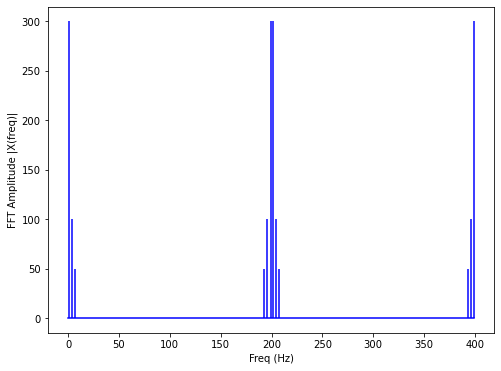

In [69]:
# and then draw its fft (you can also test defined DFT, which will have the same result)
freq = np.arange( len(y) )
plt.figure(figsize = (8, 6))
plt.stem(freq, abs( torch.fft.fft(torch.tensor(y))  ), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [75]:
# Let check what frequency components does the signal y have
amplitude = abs( torch.fft.fft(torch.tensor(y))) 
(amplitude > 0.1).nonzero().squeeze()

tensor([  1,   4,   7, 193, 196, 199, 201, 204, 207, 393, 396, 399])

In [71]:
# Remember, the center frequency 200 is the nyqsit, thus we only check the left half.
# Excapt for the original f = 1, 4 and 7. Now we also introduce f = 200-1, 200-4 and 200-7
# Note that you can play around this by changing constant and number_of_constant. 
# Constant will not change pattern, but will only introduce DC component if this is nonzero
# number_of_constan can change the pattern, but it is easy to see the new pattern. 

In [ ]:
# But what if we simply repeat each value (nearest upsampling)?

In [72]:
# Let's first create a new signal z 
number_of_repeat = 1
z = [] 
for value in x:
    z.append(np.array([value]))
    for _ in range(number_of_repeat):
        z.append( np.array([value]) )
z = np.concatenate( z, axis=0)

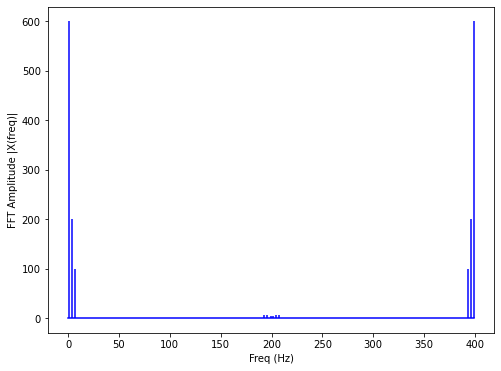

In [74]:
# And drat its FFT 
# and then draw its fft (you can also test defined DFT, which will have the same result)
freq = np.arange( len(y) )
plt.figure(figsize = (8, 6))
plt.stem(freq, abs( torch.fft.fft(torch.tensor(z))  ), 'b', markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('FFT Amplitude |X(freq)|')
plt.show()

In [77]:
# Compared with insert new value, although it also introduce signal at f = 200-1, f = 200-4 and f = 200-7,
# the new signal amplitude is not very high 